## Top 20 True Words
Since what we need is top single words not top word sets, then we will use Apriori in this case since min-apriori will not help (1-itemset in min-apriori contains all the words because the support of each word equal to 1)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

In [9]:
fake_df = pd.read_csv(r"True.csv", sep=',')
fake_df.sample(10)

,title,text,subject,date
2682,House to write tax reform bill this fall: Hous...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"July 19, 2017"
8118,Mexico president following California marijuan...,(This Sept 15 story corrects “asked” in first...,politicsNews,"September 15, 2016"
6386,U.S. intelligence chief Clapper says spoke wit...,WASHINGTON (Reuters) - U.S. Director of Nation...,politicsNews,"January 12, 2017"
11900,Multi-stage cyber attacks net North Korea mill...,SINGAPORE/SEOUL (Reuters) - A series of recent...,worldnews,"December 19, 2017"
14992,Singapore founder's grandson names lawyer in c...,"SINGAPORE/CAMBRIDGE, Massachusetts (Reuters) -...",worldnews,"November 13, 2017"
235,U.S. House committee 'may reconsider' WHO canc...,LONDON (Reuters) - U.S. congressional committe...,politicsNews,"December 8, 2017"
8187,Trump says Fed keeping rates low because of pr...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"September 12, 2016"
1870,Massachusetts ballot initiative on president t...,BOSTON (Reuters) - A proposed Massachusetts ba...,politicsNews,"September 6, 2017"
19787,Schaeuble warns against divisions in Europe af...,BERLIN (Reuters) - Describing Brexit as nonse...,worldnews,"September 18, 2017"
19777,Six civilians killed by roadside bomb in Afgha...,"KANDAHAR, Afghanistan (Reuters) - A roadside b...",worldnews,"September 18, 2017"


In [10]:
vectorizer = CountVectorizer(stop_words='english',binary=True)
matrix = vectorizer.fit_transform(fake_df['title']+' '+fake_df['text'])


In [11]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(5)


,00,000,0000,00004,000063,000270,00042,0005,0009,000938,...,zwak,zweig,zweiman,zweli,zwolinski,zynga,zypries,zyries,zyuganov,émigré
5893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1833,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
freq_items = apriori(sparse_df, min_support=0.2, use_colnames=True, max_len=1)
freq_items_sorted = freq_items.sort_values(by='support', ascending=False)
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
28,0.998179,(reuters)
29,0.936639,(said)
25,0.610169,(president)
41,0.448942,(trump)
6,0.434421,(donald)
40,0.431947,(told)
44,0.418359,(washington)
34,0.402251,(state)
10,0.393379,(government)
18,0.391185,(new)


In [14]:
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items['itemsets'].tolist()

[frozenset({'reuters'}),
 frozenset({'said'}),
 frozenset({'president'}),
 frozenset({'trump'}),
 frozenset({'donald'}),
 frozenset({'told'}),
 frozenset({'washington'}),
 frozenset({'state'}),
 frozenset({'government'}),
 frozenset({'new'}),
 frozenset({'year'}),
 frozenset({'people'}),
 frozenset({'states'}),
 frozenset({'united'}),
 frozenset({'house'}),
 frozenset({'republican'}),
 frozenset({'including'}),
 frozenset({'week'}),
 frozenset({'country'}),
 frozenset({'tuesday'})]

C:\Users\ibrahima\AppData\Local\Temp\ipykernel_26172\2613665088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))


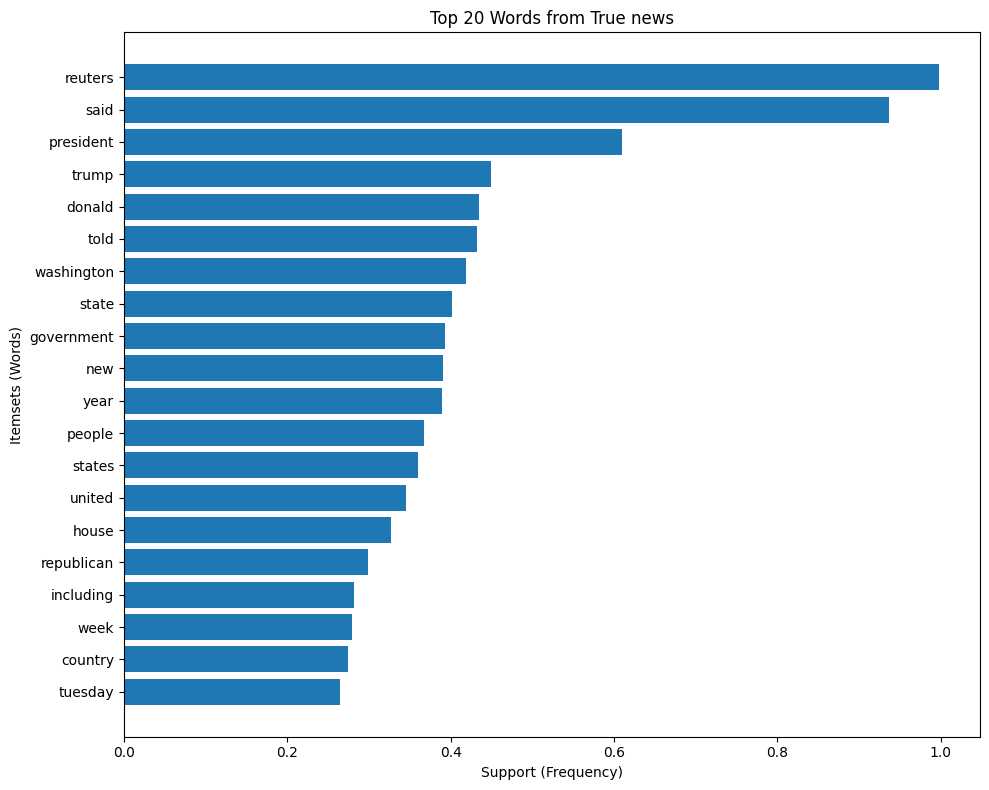

In [15]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(top_20_freq_items['itemsets_str'], top_20_freq_items['support'])
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets (Words)')
plt.title('Top 20 Words from True news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()